In [4]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
train_dataset = "/content/drive/MyDrive/17flowers/train"
test_dataset = "/content/drive/MyDrive/17flowers/test"

In [43]:
img_data_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255 ,
    validation_split=0.1,
)
train_data= img_data_generator.flow_from_directory(
    train_dataset ,
    shuffle=True,
    subset="training",
    target_size=(299,299)
)

validation_data = img_data_generator.flow_from_directory(
    test_dataset,
    shuffle=True,
    subset="validation",
    target_size=(299,299)
)

Found 925 images belonging to 17 classes.
Found 31 images belonging to 17 classes.


In [44]:
initial_model = tf.keras.applications.InceptionResNetV2(weights="imagenet" , include_top=False , input_shape=(299,299,3))
#initial_model.summary()

# Adding fully connected layers to model :

In [45]:
model = tf.keras.models.Sequential([
    initial_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dense(17 , activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 98304)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               50332160  
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 17)                4369      
                                                                 
Total params: 104804593 (399.80 MB)
Trainable params: 104744049 (399.57 MB)
Non-trainable params: 60544 (236.50 KB)
____

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001) ,
              loss=tf.keras.losses.categorical_crossentropy ,
              metrics=["accuracy"] )

In [47]:
history = model.fit(train_data , validation_data=validation_data , epochs=30)


Epoch 1/30
29/29 [==============================] - 129s 1s/step - loss: 5.0585 - accuracy: 0.0605 - val_loss: 2.7921 - val_accuracy: 0.0645
Epoch 2/30
29/29 [==============================] - 39s 1s/step - loss: 2.9053 - accuracy: 0.0746 - val_loss: 2.7813 - val_accuracy: 0.1290
Epoch 3/30
29/29 [==============================] - 38s 1s/step - loss: 2.6132 - accuracy: 0.1784 - val_loss: 2.5874 - val_accuracy: 0.3226
Epoch 4/30
29/29 [==============================] - 39s 1s/step - loss: 1.6297 - accuracy: 0.4843 - val_loss: 2.0675 - val_accuracy: 0.3871
Epoch 5/30
29/29 [==============================] - 39s 1s/step - loss: 0.8759 - accuracy: 0.7265 - val_loss: 1.4509 - val_accuracy: 0.6129
Epoch 6/30
29/29 [==============================] - 38s 1s/step - loss: 0.4669 - accuracy: 0.8551 - val_loss: 0.9354 - val_accuracy: 0.7742
Epoch 7/30
29/29 [==============================] - 39s 1s/step - loss: 0.2211 - accuracy: 0.9308 - val_loss: 0.7556 - val_accuracy: 0.8387
Epoch 8/30
29/29 [=

In [48]:
model.save("/content/17flowers_weights.keras")

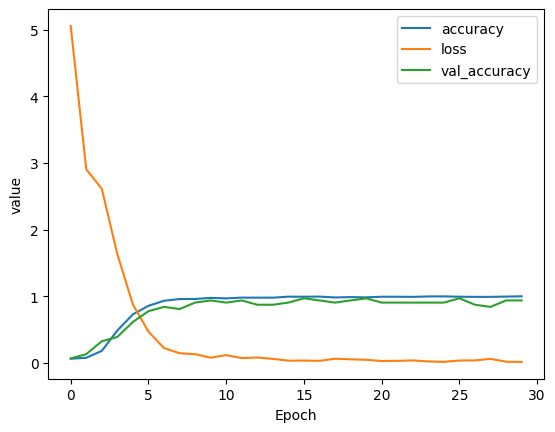

In [49]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","loss" , "val_accuracy" , "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [ ]:
images,labels = validation_data[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))

In [54]:
np.array(ytrue_list)

array([15,  6,  2,  2,  4, 12, 11,  3,  9,  0, 14, 10, 11,  0,  4,  1,  6,
        1, 15, 10,  9,  7,  8, 14,  8, 16,  5,  5,  7, 13,  3])

In [56]:
np.array(ypred_list)

array([15,  6,  2,  2,  4, 12, 11,  3,  9,  0,  0, 10, 11,  0,  0,  1,  6,
        1, 15, 16,  9,  7,  8, 14,  8, 16,  5,  5,  7, 13,  3])

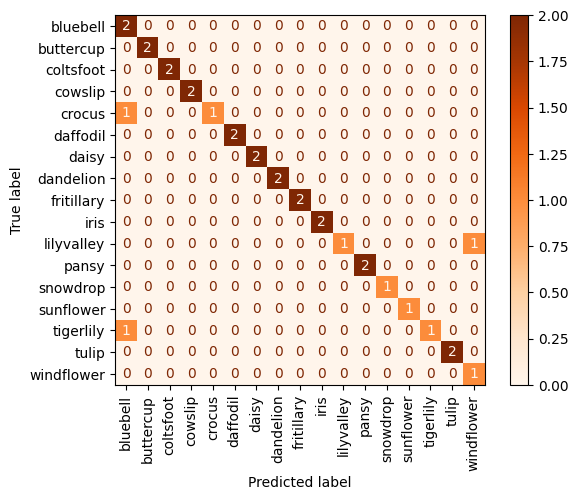

In [57]:
confm = metrics.confusion_matrix(y_true= ytrue_list , y_pred= ypred_list  )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confm , display_labels=['bluebell','buttercup','coltsfoot','cowslip','crocus','daffodil','daisy','dandelion','fritillary','iris','lilyvalley','pansy','snowdrop','sunflower','tigerlily','tulip','windflower'])
cm_display.plot(cmap=plt.cm.Oranges , xticks_rotation="vertical")
plt.show()

# Inference

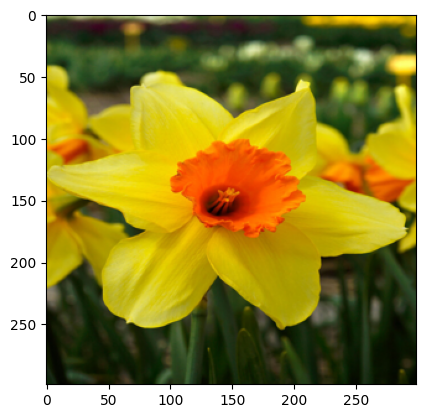

In [63]:
from PIL import Image
import cv2
image = Image.open("/content/daf.jpg")
new_image = image.resize((299,299))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [64]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 299, 299, 3])
print(img.shape)
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_data.class_indices)
mylist = list(train_data.class_indices)
print("predicted label : " , mylist[np.argmax(output)])

(299, 299, 3)
(1, 299, 299, 3)
1/1 [==============================] - 0s 177ms/step
5
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
predicted label :  daffodil


1/1 [==============================] - 0s 71ms/step
10
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
predicted label :  lilyvalley


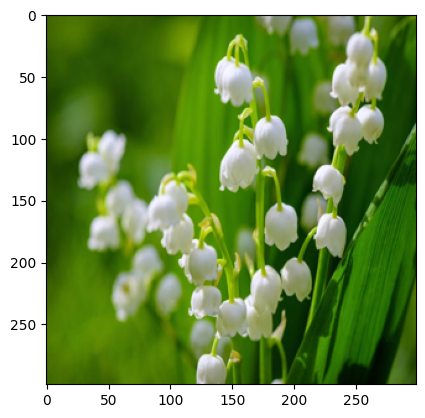

In [73]:
image = Image.open("/content/lili1.jpeg")
new_image = image.resize((299,299))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
img = np.reshape(new_image, [1, 299, 299, 3])
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_data.class_indices)
mylist = list(train_data.class_indices)
print("predicted label : " , mylist[np.argmax(output)])

1/1 [==============================] - 0s 144ms/step
12
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
predicted label :  snowdrop


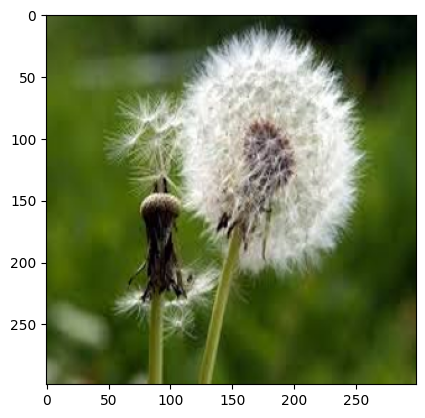

In [86]:
image = Image.open("/content/dand2.jpg")
new_image = image.resize((299,299))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
img = np.reshape(new_image, [1, 299, 299, 3])
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_data.class_indices)
mylist = list(train_data.class_indices)
print("predicted label : " , mylist[np.argmax(output)])